In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('50_Startups.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.corr(numeric_only=True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: xlabel='R&D Spend', ylabel='Profit'>

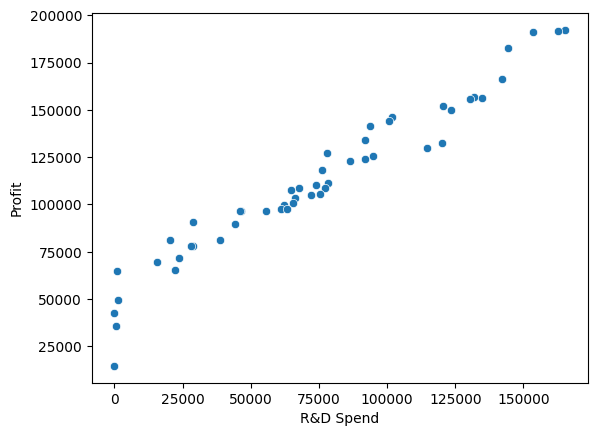

In [11]:
import seaborn as sns
%matplotlib inline
sns.scatterplot(x = data['R&D Spend'],y = data['Profit'])

**Normality Test**

Its all about testing to identify if the given column is normally distributed

<ipython-input-5-45975f944d3b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['R&D Spend'])


<Axes: xlabel='R&D Spend', ylabel='Density'>

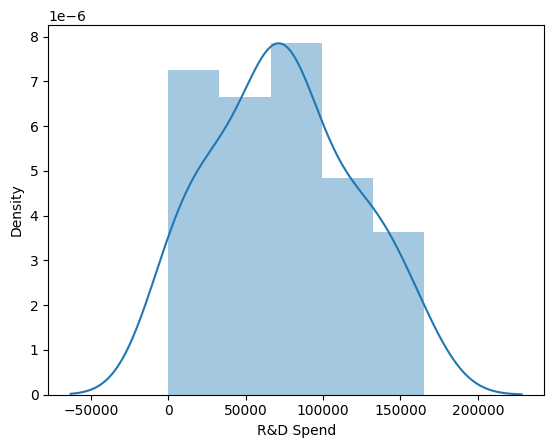

In [5]:
import seaborn as sns
%matplotlib inline

sns.distplot(data['R&D Spend'])

In [6]:
# Performing Hypothesis Testing
#
# Step1: Create a Viable Question
#
# Question: Test whether R&D Spend is normally distributed
#
# Step2: Convert the Question into Hypothesis (H0 and Ha)
#
# Null Hypothesis (H0): R&D Spend is NOT normally distributed
# Alternate Hypothesis (Ha | H1): R&D Spend is normally distributed
#
# Step3: Select the Statistical Test Formula / Tool to validate the hypothesis
#
# Shapiro Test
#
# Step4: Select the SL | Alpha Value ==== 0.05
#
# SL =0.05
#
# Step5: Find the p-value from the test and compare the same with SL to identify which Hypothesis is passing
#
#
#
# EXCEPTION ALERT ! ----- For Normality to pass Ha, pvalue >= SL

SL = 0.05

from scipy.stats import shapiro

corr, pvalue = shapiro( data['R&D Spend'] )

if pvalue >= SL:
  print("Alternate Hypothesis (Ha | H1): R&D Spend is normally distributed")
else:
  print("Null Hypothesis (H0): R&D Spend is NOT normally distributed")

Alternate Hypothesis (Ha | H1): R&D Spend is normally distributed


**Test for Feature Elimination**

Multi-collinearity -- columns that have similar statistical significance / Columns that are statistically same.

To Identify multi-collinearity one of way is to perform parametric or non-parametric test

1. Parametric Test  - if the given two columns are passing normality test | if the given two columns are normally distributed
2. Non parametric Test - if the given two columns are failing normality test | if the given two columns are not normally distributed

In [15]:
# Example of Parametric test
# Note: Ensure both columns are normally distributed

# Performing Hypothesis Testing
#
# Step1: Create a Viable Question
#
# To check whether to preserve R&D Spend	& Administration cols
#
# Step2: Convert the Question into Hypothesis (H0 and Ha)
#
# h0 - R&D Spend and Admin are NOT unequal (multi-collinearity)
# ha - R&D Spend and Admin are unequal (no multi-collinearity)
#
# Step3: Select the Statistical Test Formula / Tool to validate the hypothesis
#
#Parametric test -------  Student t-test
#
# Step4: Select the SL | Alpha Value ==== 0.05
#
# SL = 0.05
#
# Step5: Find the p-value from the test and compare the same with SL to identify which Hypothesis is passing
#
#
SL = 0.05

from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import f_oneway

corr, pvalue = ttest_ind( data['R&D Spend'] , data['Administration'] )

if pvalue <= SL:
  print("ha - R&D Spend and Admin has no statistical similarity. Thus preserve both")
else:
  print("h0 - R&D Spend and Admin has statistical similarity resulting in multicollinearity issue. Thus eliminate one of them")


ha - R&D Spend and Admin has no statistical similarity. Thus preserve both


In [17]:
#Example of using ANOVA for parametric test
# ANOVA is the only test that can accept n number of features
from scipy.stats import f_oneway

corr, pvalue = f_oneway( data['R&D Spend'] , data['Administration'] )

if pvalue <= SL:
  print("ha - R&D Spend and Admin has no statistical similarity. Thus preserve both")
else:
  print("h0 - R&D Spend and Admin has statistical similarity resulting in multicollinearity issue. Thus eliminate one of them")


ha - R&D Spend and Admin has no statistical similarity. Thus preserve both


In [14]:
# Example of Non- Parametric test
# Note: Ensure both columns are not normally distributed

SL = 0.05

from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy.stats import friedmanchisquare

corr, pvalue = wilcoxon( data['R&D Spend'] , data['Administration'] )

if pvalue <= SL:
  print("ha - R&D Spend and Admin has no statistical similarity. Thus preserve both")
else:
  print("h0 - R&D Spend and Admin has statistical similarity resulting in multicollinearity issue. Thus eliminate one of them")


ha - R&D Spend and Admin has no statistical similarity. Thus preserve both


**Chi-square Test**

It is applicable for Categorical Data

Deal with features and label

1. Feature is categorical and label is numerical
2. Feature is categorical and label is categorical
3. Feature is numerical and label is categorical

**Goal:** The goal of this test is to check whether there exist any kind of statistical relationship between feature and label. If relationship exists, preserve the feature else eliminate the feature

In [18]:

# Performing Hypothesis Testing
#
# Step1: Create a Viable Question
#
# To check whether to State and Profit have any kind of statistical relationship
#
# Step2: Convert the Question into Hypothesis (H0 and Ha)
#
# h0 - State and Profit has NO statistical relationship
# ha - State and Profit has statistical relationship
#
# Step3: Select the Statistical Test Formula / Tool to validate the hypothesis
#
# Chisquare test
#
# Step4: Select the SL | Alpha Value ==== 0.05
#
# SL = 0.05
#
# Step5: Find the p-value from the test and compare the same with SL to identify which Hypothesis is passing
#
#

# Step1: Create Pivot Table
#    pd.crosstab(feature,label) --- This format is mandatory for chisq testing
ct = pd.crosstab(data['State'],data['Profit'])
ct

Profit,14681.40,35673.41,42559.73,49490.75,64926.08,65200.33,69758.98,71498.49,77798.83,78239.91,...,149759.96,152211.77,155752.60,156122.51,156991.12,166187.94,182901.99,191050.39,191792.06,192261.83
State,,,,,,,,,,,,,,,,,,,,,
California,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
Florida,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
New York,0,1,0,0,1,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1


In [21]:
SL = 0.05

from scipy.stats import chi2_contingency

_,_, pvalue,_ = chi2_contingency( ct )

if pvalue <= SL:
  print("ha - State and Profit has statistical relationship")
else:
  print("h0 - State and Profit has NO statistical relationship")


h0 - State and Profit has NO statistical relationship


In [22]:
?chi2_contingency